## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Understanding

In [2]:
#load teh csv data to a pandas dataframe

df=pd.read_csv("Telco_Customer_Churn.csv")

In [3]:
# First 5 rows of the dataset

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Last 5 rows of the dataset

df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Dataset:
    
Telecom Churn Prediction Dataset

- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, services used, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

In [5]:
#number of row and columns

df.shape

(7043, 21)

The dataset contains 7043 rows and 21 columns.

In [6]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Thats show you the missing values in the dataset and what are all the different data types inthe different columns

In [7]:
# Checking the number of missing value in each column in the dataset

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# checking the  number  of duplicated values in test data

df.duplicated().sum()

0

In [9]:
# checking the unique value

for col in df.columns:
    print(col,df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSec

## Data preprocecing

In [10]:
#Missing values in the TotalCharges column were replaced with 0

df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [11]:
df['TotalCharges']=df['TotalCharges'].replace({" ":"0.0"})

In [12]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [13]:
df['TotalCharges'].astype

<bound method NDFrame.astype of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [14]:
#customer ID column as this is not requrired for modeling

df=df.drop(columns=['customerID'])

In [15]:
# checking the class distribution of target column

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


This Dataset is highly unblanced
* NO ---> Staye
* YES ---> Left

In [16]:
#Convertin the predictor variable in a binary numeric variable

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

Insights:

* Customer ID removed as it is not required for modelling
* No mmissing values in the dataset
* Missing values in the TotalCharges column were replaced with 0
* Class imbalance identified in the target

###  Exploratory Data Analysis (EDA)

In [17]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [18]:
# Total columns

len(df_dummies.columns)

46

<Axes: >

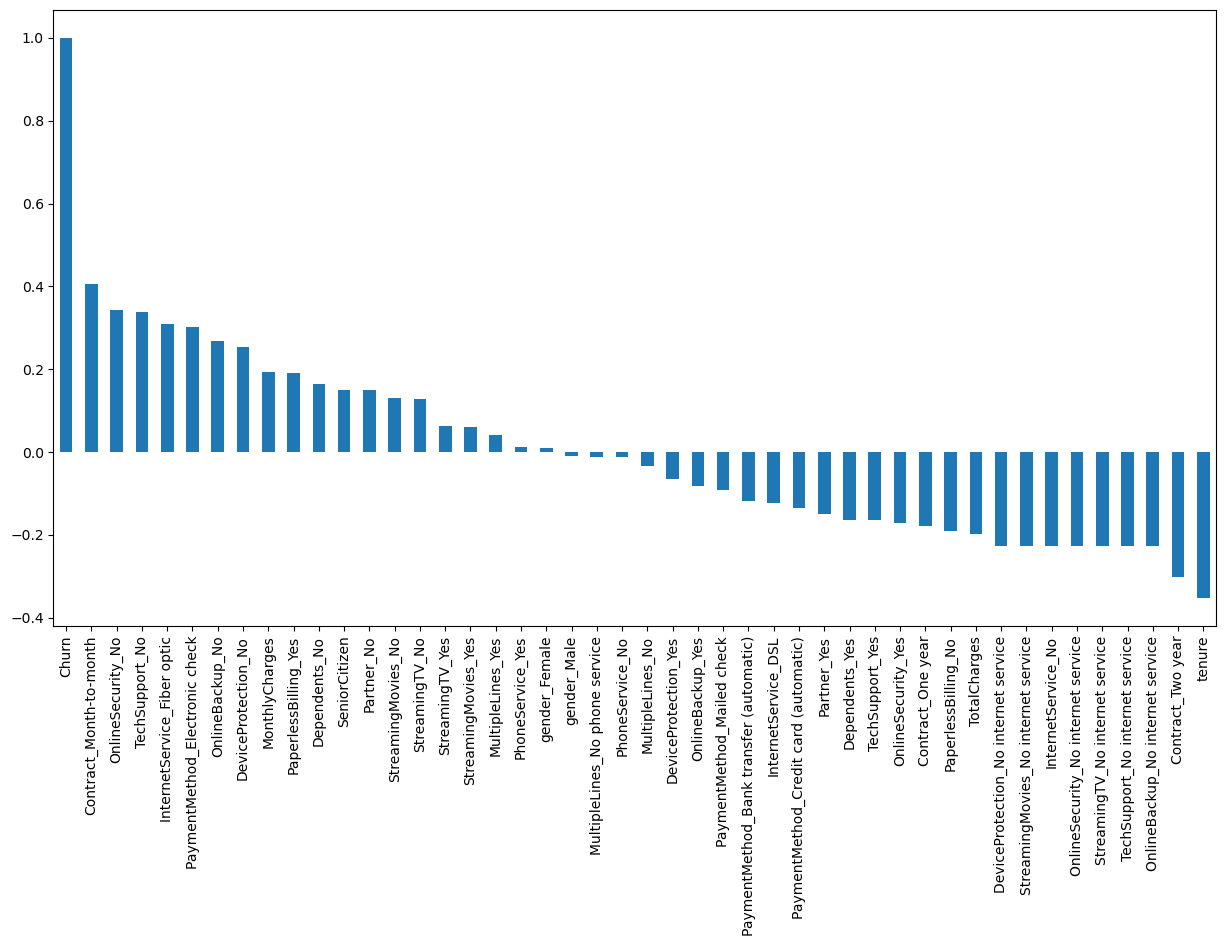

In [19]:
# Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Intepretation

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet 
connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying
the important variables.

tenure (-0.4): This shows a moderate negative correlation between tenure (length of time as a customer) and churn. 
Customers with longer tenures are less likely to churn than those with shorter tenures. This is a common finding; 
more established customers are generally less prone to switching.

## Data Exploration

- To understand patterns & potentially form some hypothesis

### A) Demographic

- Gender, Age Range, Partner and Dependent status

------------------------------------------------------

#### 1) Gender Distribution

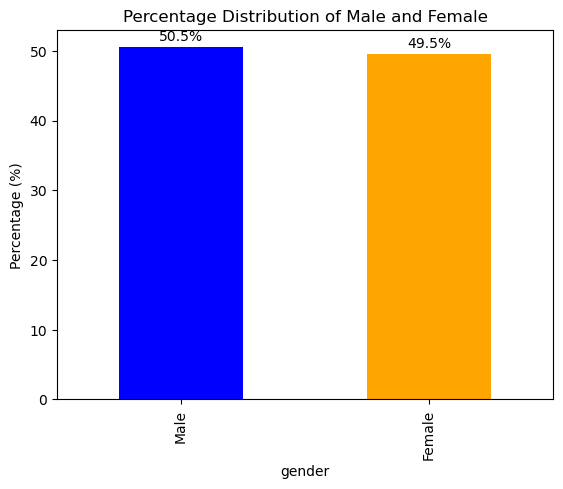

In [20]:
# Value counts and percentage calculation

counts = df['gender'].value_counts()
percentages = counts / counts.sum() * 100

# Plot bar chart with percentages

percentages.plot(kind='bar', color=['blue', 'orange'])
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution of Male and Female')
for index, value in enumerate(percentages):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

# ----->
- Almost half are male & other half are female

#
#### 2) Senior Citizen (%)

Text(0.5, 1.0, '% of Senior Citizens')

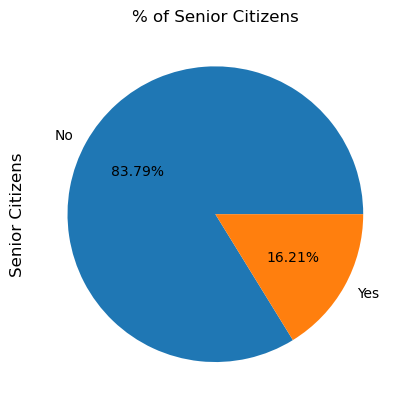

In [21]:
df['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%.2f%%', labels = ['No', 'Yes'])#figsize =(5,5), fontsize = 12 )
plt.ylabel('Senior Citizens',fontsize = 12)
plt.title('% of Senior Citizens', fontsize = 12)

## ------>

- Only 16% are senior citizen, that means most of the customer are younger people

# 
#### 3) Partner and dependent status

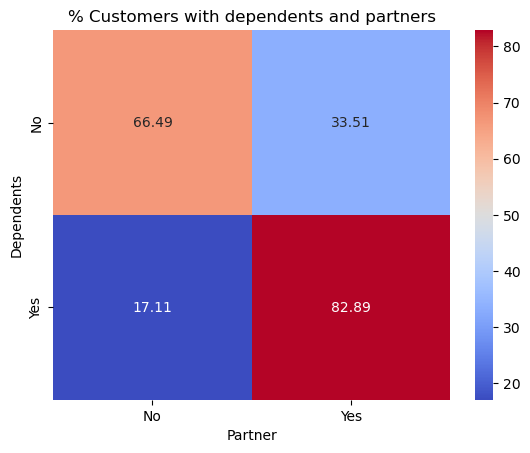

In [22]:
crosstab_percentage= pd.crosstab(df['Dependents'], df['Partner'], normalize='index') * 100
sns.heatmap(crosstab_percentage, fmt=".2f", annot=True, cmap="coolwarm")
plt.xlabel('Partner')
plt.ylabel('Dependents')
plt.title('% Customers with dependents and partners')
plt.show()

## ----->

* 82.89% of customers with dependents also have a partner, making it the largest segment.
* 66.49% of customers without dependents do not have a partner.
* 33.51% of customers without dependents still have a partner.
* Only 17.11% of customers have dependents but no partner.

### B) Customer Account Information

- Tenure & contract

------------------------------------------

#### 1)Tenure

<Axes: xlabel='tenure'>

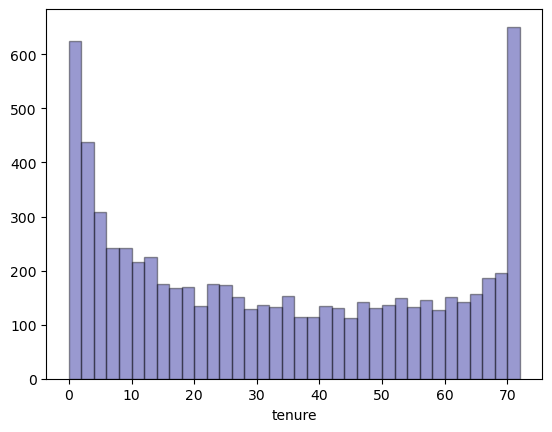

In [23]:
sns.distplot(df['tenure'],hist=True, kde=False, bins=int(180/5), color = 'darkblue',hist_kws={'edgecolor':'black'})

#### 2)Contracts

Text(0.5, 1.0, 'No. of Customers by Contract Type')

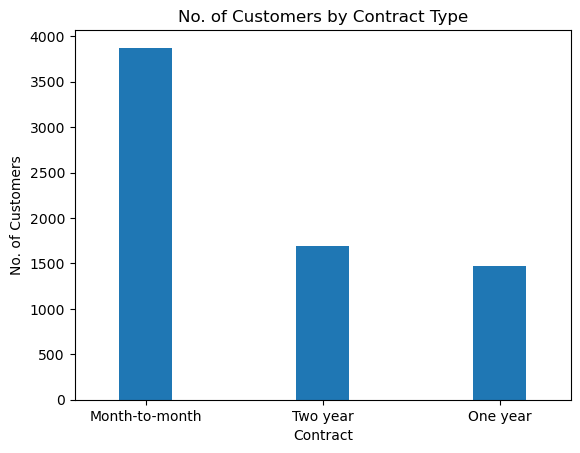

In [24]:
df['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
plt.ylabel('No. of Customers')
plt.title('No. of Customers by Contract Type')

## ----->
* Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

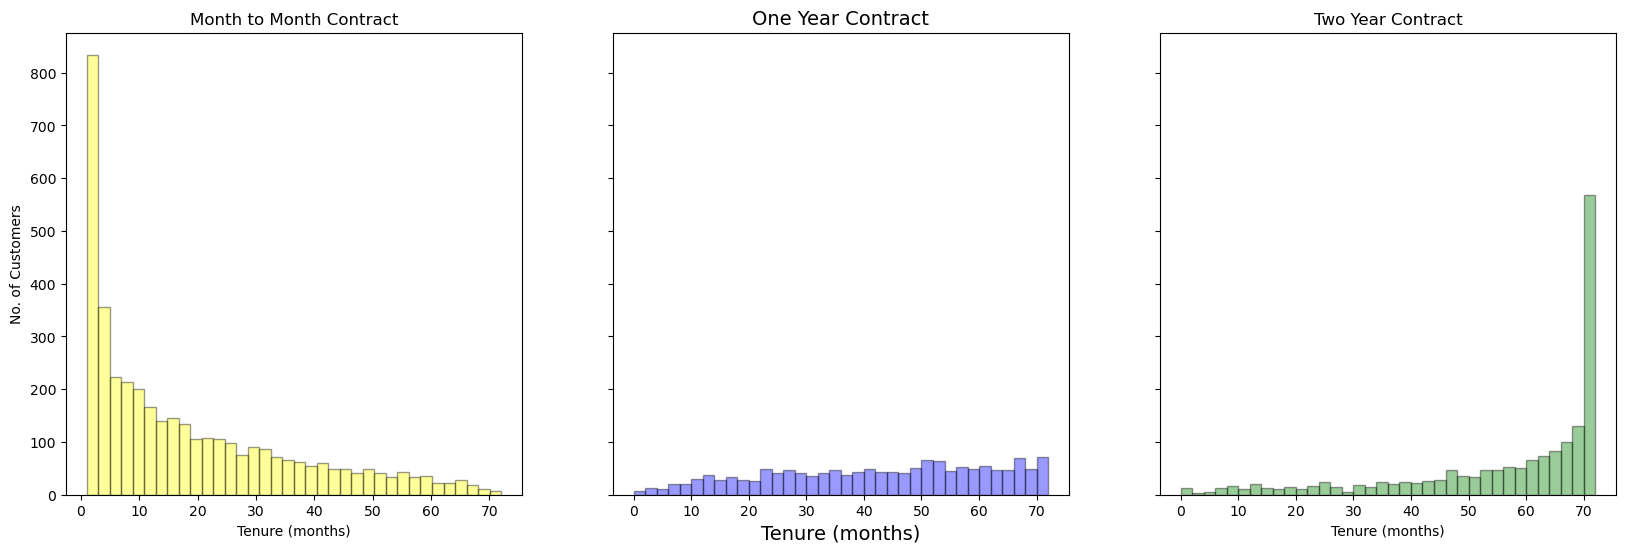

In [25]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))
ax= sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],# months ko filter kiya
                   hist=True, kde=False,
                   bins=int(180/5), color = 'yellow',
                   hist_kws={'edgecolor':'black'},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')


ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)



ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

## ----->

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. 
This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

###  C) Services Used by Customers

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

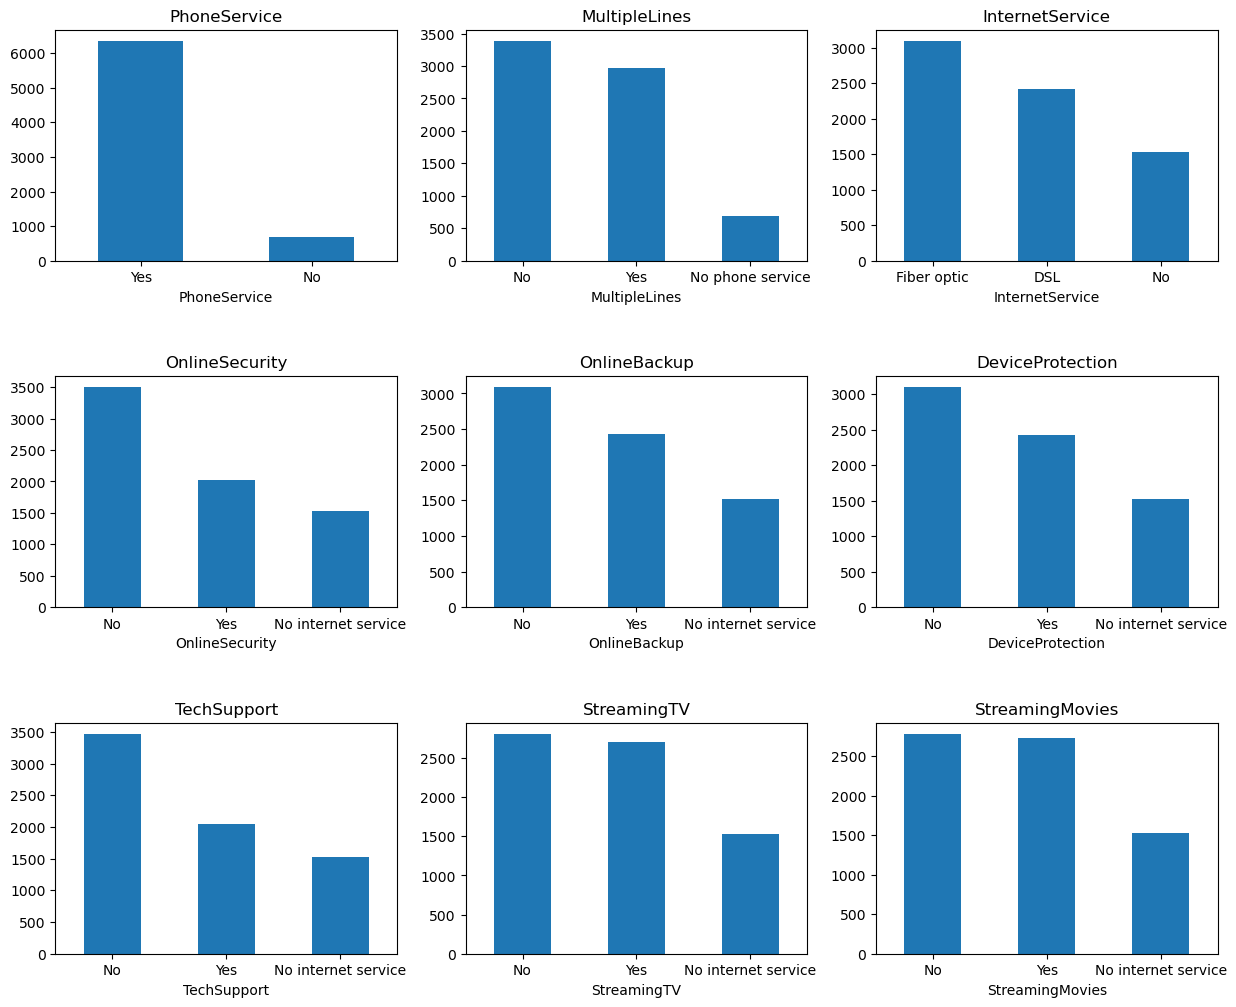

In [27]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5) 

for i, item in enumerate(services):
    row, col = divmod(i, 3)  

    # This line creates a bar chart for each service.
    ax = df[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)


plt.show()

### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

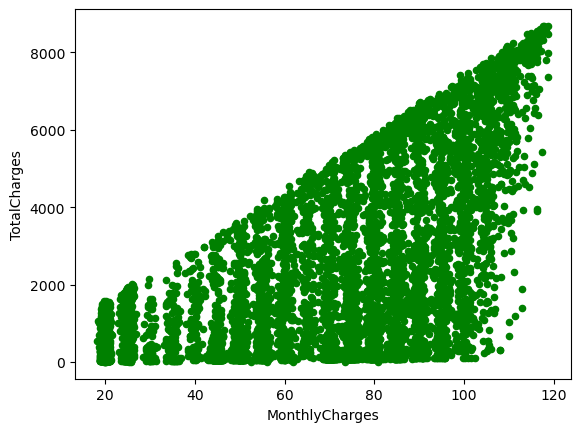

In [28]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

## ----->
* Total charges increases as the monthly bill for a customer increases

### E) Relationship between idependent variable (Churn) & other important variables

Churn rate by ------> tenure, seniority, contract type, monthly charges and total charges

#### 1) Churn rate with Customer

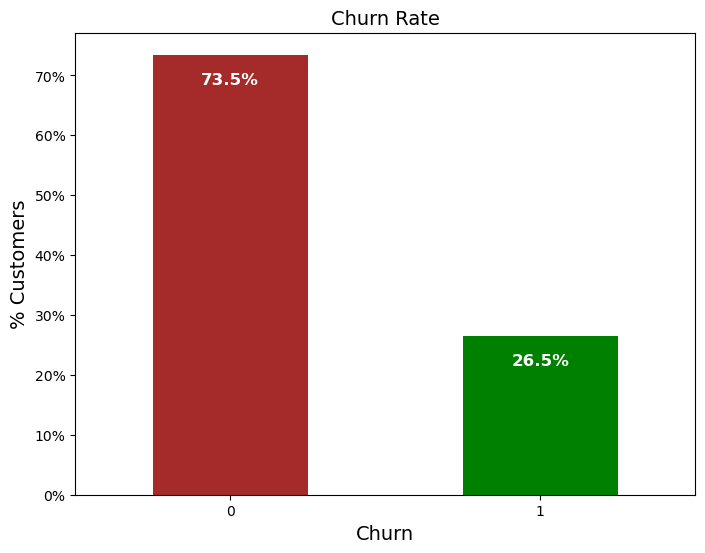

In [29]:
#import matplotlib.ticker as mtick

# Define colors
colors = ['brown', 'green']

# Plot the churn data
ax = (df['Churn'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color=colors,
    figsize=(8, 6),
    rot=0
)

# Format the y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Add percentage labels on bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,  # Center text horizontally
        p.get_height() - 5,            # Position text slightly below the top
        f'{p.get_height():.1f}%',      # Format height as a percentage
        ha='center',                   # Horizontal alignment
        fontsize=12,
        color='white',
        weight='bold'
    )

plt.show()


#### 2) Churn by Contract Type

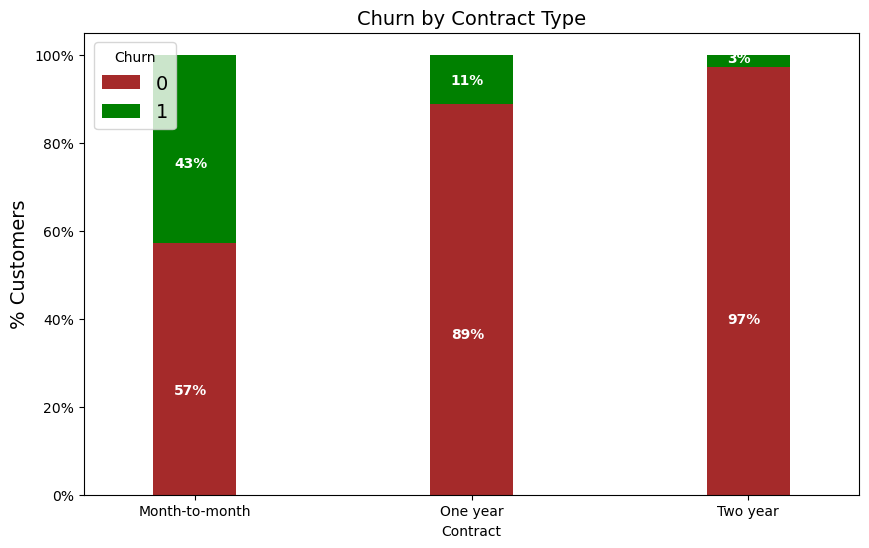

In [30]:
# colors = ['orange','brown']
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

## ----->
* The customers who have a month to month contract have a very high churn rate.

#### 3) Churn vs Tenure

<Axes: xlabel='Churn', ylabel='tenure'>

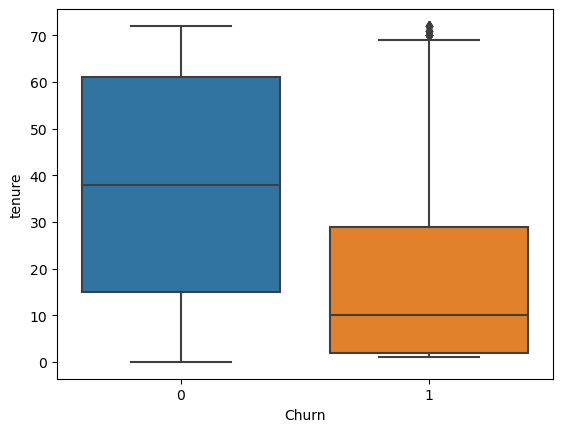

In [31]:
sns.boxplot(x = df.Churn, y = df.tenure)

## ----->
* The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

#### 4)Churn by Monthly Charges

Text(0, 0.5, 'Density')

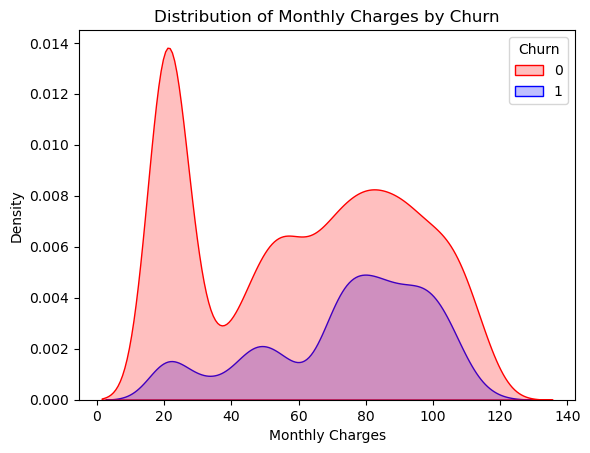

In [32]:
ax = sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", shade=True, palette=["red", "blue"])

# Set plot title and labels
ax.set_title('Distribution of Monthly Charges by Churn')
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')

### ----->
* Higher % of customers churn when the monthly charges are high.


#### 5) Churn by Total Charges

Text(0, 0.5, 'Density')

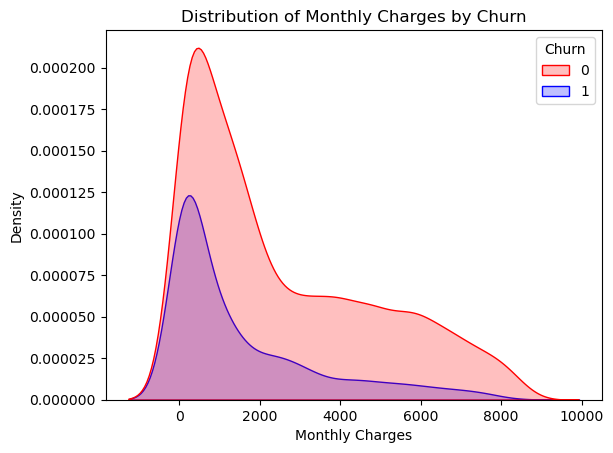

In [33]:
ax = sns.kdeplot(data=df, x="TotalCharges", hue="Churn", shade=True, palette=["red", "blue"])

# Set plot title and labels
ax.set_title('Distribution of Monthly Charges by Churn')
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Density')

## ---->
* higher propensity for churn among customers with lower total charges

## Divide data into two parts: test and train.

In [34]:
# We will use the data frame where we had created dummy variables

y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

In [35]:
#from sklearn.preprocessing import MinMaxScaler
# Scaling all the variables to a range of 0 to 1

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [36]:
#from sklearn.model_selection import train_test_split

# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Predictive modeling - ML Algorithms

* Logistic Regression,
* Random Forest,
* XG Boost

### 1. Logistic Regresson

In [37]:
#from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
result = model.fit(X_train, y_train)

In [38]:
#from sklearn import metrics

prediction_test = model.predict(X_test)

In [39]:
# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8059630856601988


Axes(0.125,0.11;0.775x0.77)


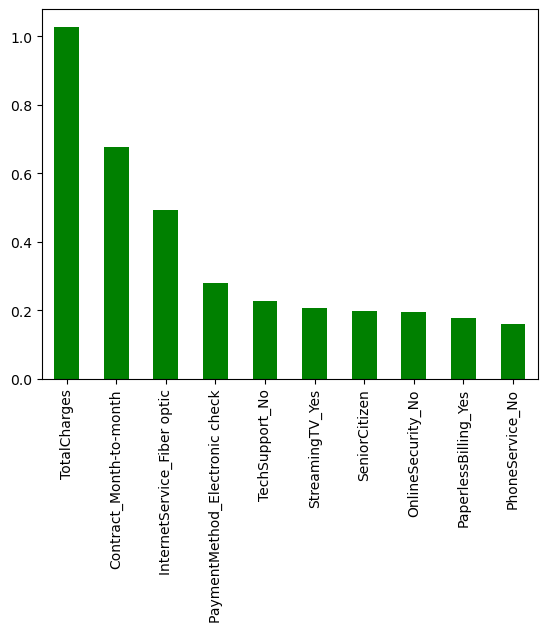

In [40]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


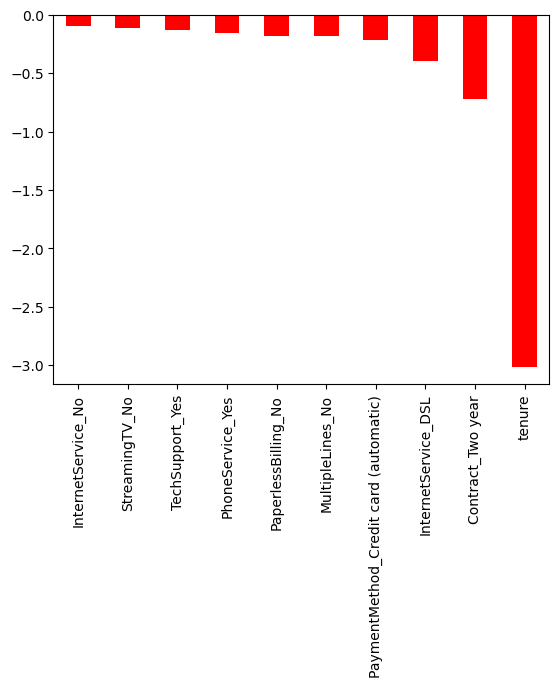

In [41]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))

Observations - LR

Some variable has positive & some negative relation with Predictive Variable (Churn)

* In EDA, having two month contracts reduces chance of Churn. That means it has negative relation with Churn.
* DSL internet also reduces the the probability of churn.
* total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

### 2. Random Forest

In [42]:
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [43]:
# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7984386089425124


<Axes: >

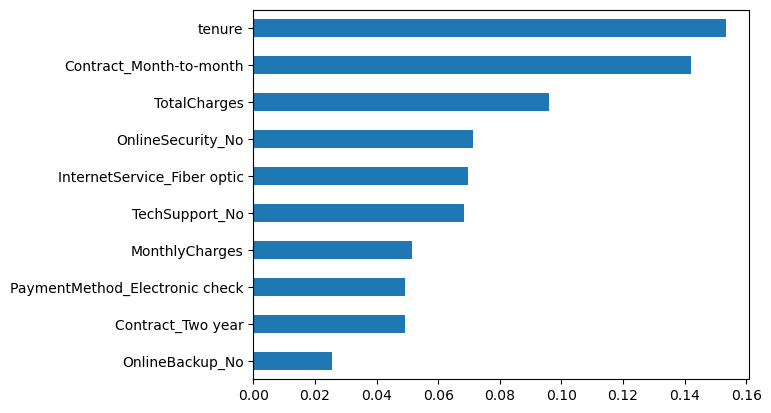

In [44]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Observations - Random Forest

* Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from   our EDA

### 3. XG Boost

In [45]:
#from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7735982966643009

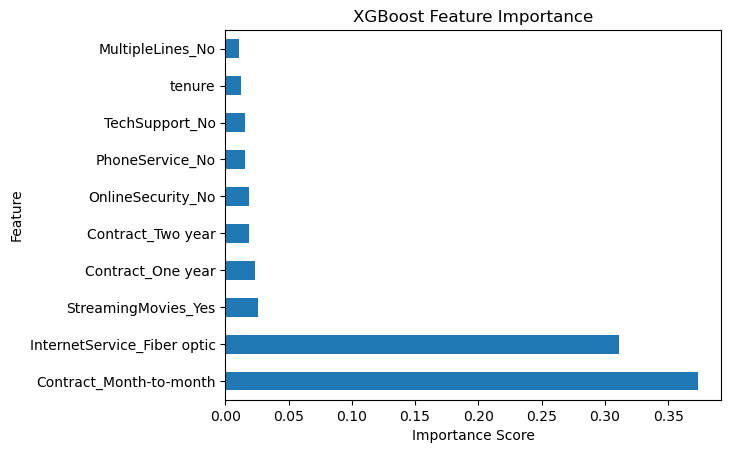

In [47]:
# Get feature importances
importance_values = model.feature_importances_
feature_names = X.columns  # Make sure this is correct!

# Create a Pandas Series for easy plotting
feature_importances = pd.Series(importance_values, index=feature_names)

# Plot top 10 features
feature_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

 The key takeaway here is the strong influence of contract type, especially month-to-month contracts, on the model's predictions.

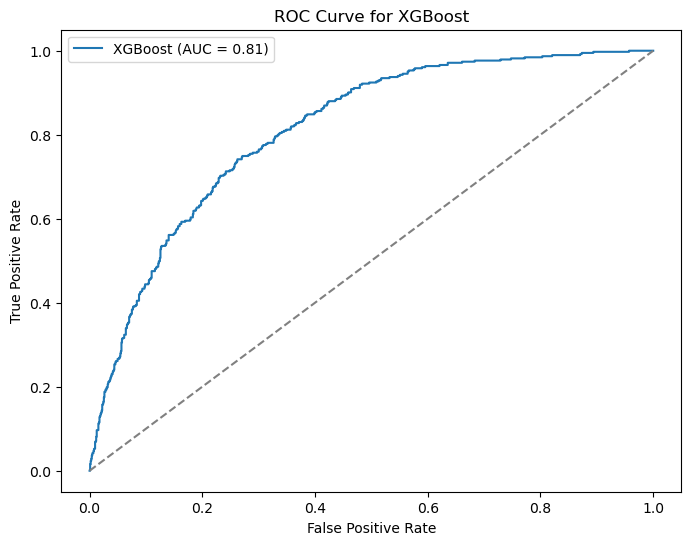

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probs = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

Observation

* Since the ROC curve is well above the diagonal and AUC = 0.81, the XGBoost model is performing well in distinguishing between positive and negative classes.
* XG Boost is a slow learning model and is based on the concept of Boosting.

### The selected_features list in churn_main.py includes:

* tenure: This is the length of time (in months) a customer has been with the company. Intuitively, longer tenure might suggest higher customer loyalty and lower churn. The earlier analysis likely showed a correlation between tenure and churn (shorter tenure correlates with higher churn).

* InternetService: This categorical variable indicates the type of internet service the customer uses (DSL, Fiber optic, No). Different internet service plans might have varying customer satisfaction levels and churn rates. Previous analysis likely revealed differences in churn rates among these service types.

* Contract: This categorical variable indicates the type of contract the customer has (Month-to-month, One year, Two year). Contract type strongly impacts churn; month-to-month contracts have considerably higher churn rates. This was almost certainly highlighted in earlier analysis.

* MonthlyCharges: The customer's monthly charges. Higher monthly charges might correlate with higher churn if customers are price-sensitive.

* TotalCharges: The total amount the customer has spent. Similar to monthly charges, it could indicate price sensitivity or customer value.

